## Discretization Task

### Import packages

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.util import ngrams
import nltk
import itertools

### 1. Discretize using percentiles

In [2]:
dataset03 = pd.read_csv("dataset/BATADAL_dataset03.csv")
dataset03.columns

Index(['DATETIME', 'L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
       'F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4',
       'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8',
       'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2',
       'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415',
       'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG'],
      dtype='object')

q1: 1.650647044
q3: 0.6799142842000001


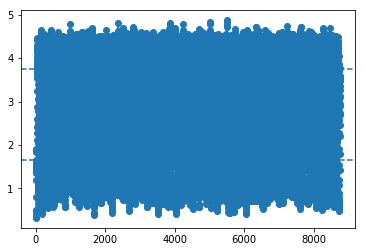

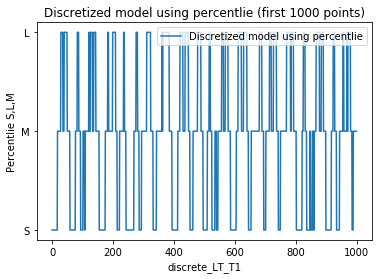

In [15]:
a = dataset03['L_T1']
# first find q1
q = 25
q1 = np.percentile(a,q,axis=0,interpolation ='linear')
print("q1:",q1)
# and then find q2
q = 75
q3 = np.percentile(a,q,axis=0,interpolation ='linear')
print("q3:",q2)
plt.figure()
a.plot(marker="o")
a.describe()
plt.axhline(y=q1,linestyle='--',label=".25 percentile")
plt.axhline(y=q3,linestyle='--',label=".75 percentile")


# anything below q1 is "S", anything between q1 and q3 is "M", and anything over q3 is "L"
discrete = []
for x in a:
    if x <= q1:
        discrete.append("S")
    elif x > q1 and x < q3:
        discrete.append("M")
    elif x >= q3:
        discrete.append("L")

dataset03['discrete_LT_T1'] = discrete
dataset03['discrete_LT_T1']
plt.figure()
plt.plot(dataset03['discrete_LT_T1'][:1000], label='Discretized model using percentlie') 
plt.title("Discretized model using percentlie (first 1000 points)")
plt.legend(loc ='upper right')
plt.xlabel('discrete_LT_T1')
plt.ylabel('Percentlie S,L,M')
plt.show()

In [17]:
dataset03['discrete_LT_T1'].value_counts()

M    4379
L    2191
S    2191
Name: discrete_LT_T1, dtype: int64

### 2. Compute Conditional Probability of Trigrams 
We try to compute the trigrams (N-gram with N=3) conditional probability

In [65]:
trigrams = ngrams(dataset03['discrete_LT_T1'], 3)

In [66]:
trigrams_list = []
for w0,w1,w2 in trigrams:
  trigrams_list.append((w0,w1,w2))

In [67]:
condition_pairs = [((w0, w1), w2) for w0, w1, w2 in trigrams_list]
cfd = nltk.ConditionalFreqDist(condition_pairs)
cpd_mle = nltk.ConditionalProbDist(cfd, nltk.MLEProbDist, bins=3)

In [77]:
possible_permutations = [subset for subset in itertools.permutations(['S','M','L'], 3)]

In [79]:
for (a,b,c) in possible_permutations:
    print ("P(",c,"|",a,",",b,") =",cpd_mle[(a,b)].prob(b))

P( L | S , M ) = 0.9901477832512315
P( M | S , L ) = 0
P( L | M , S ) = 0.9455445544554455
P( S | M , L ) = 0.9554794520547946
P( M | L , S ) = 0
P( S | L , M ) = 0.9828767123287672


In [80]:
# with laplace smoothing
cpd_laplace = nltk.ConditionalProbDist(cfd, nltk.LaplaceProbDist, bins=3)

In [81]:
for (a,b,c) in possible_permutations:
    print ("P(",c,"|",a,",",b,") =",cpd_laplace[(a,b)].prob(b))

P( L | S , M ) = 0.9805825242718447
P( M | S , L ) = 0.3333333333333333
P( L | M , S ) = 0.9365853658536586
P( S | M , L ) = 0.9491525423728814
P( M | L , S ) = 0.3333333333333333
P( S | L , M ) = 0.976271186440678
